In [30]:
import cv2
import os 
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
img_path = './cloud_images/original/2021_11_22__12_15_14_crop.jpg'

In [32]:
img = cv2.imread(img_path)
image_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

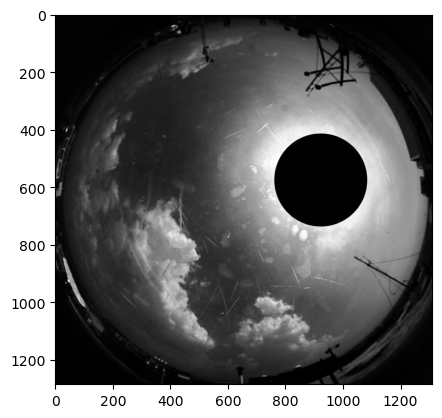

In [33]:
plt.imshow(image_gray, cmap='gray')

In [34]:
crop_mask = cv2.imread('./crop_mask3.png')

In [35]:
blur = cv2.GaussianBlur(image_gray,(5,5),0)

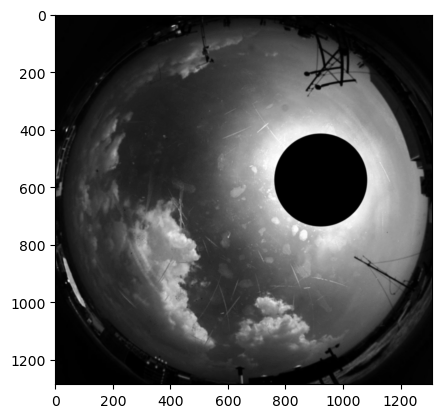

In [36]:
plt.imshow(blur, cmap='gray')

In [37]:
ret, otsu = cv2.threshold(blur,255,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

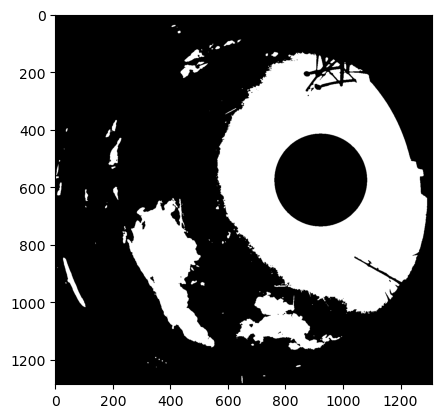

In [38]:
plt.imshow(otsu, cmap='gray')

In [39]:
gray_3_channel = cv2.merge((otsu, otsu, otsu))

In [40]:
crop_mask.shape

(1285, 1310, 3)

In [41]:
gray_3_channel.shape

(1285, 1310, 3)

In [42]:
new_img_mask = cv2.bitwise_or(crop_mask,gray_3_channel)

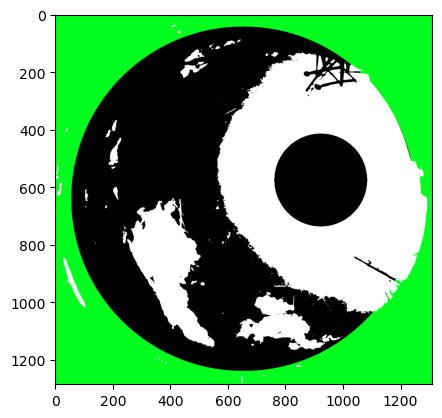

In [43]:
plt.imshow(new_img_mask)

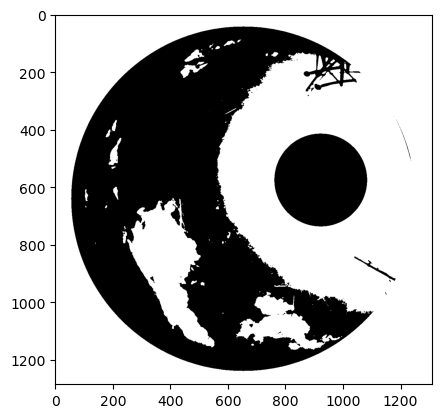

In [44]:
new_img_mask_gray = cv2.cvtColor(new_img_mask, cv2.COLOR_RGB2GRAY)
ret, otsu2 = cv2.threshold(new_img_mask_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu2, cmap='gray')

In [45]:
crop_gray = cv2.cvtColor(crop_mask, cv2.COLOR_RGB2GRAY)

In [46]:
new2 = crop_gray+otsu2

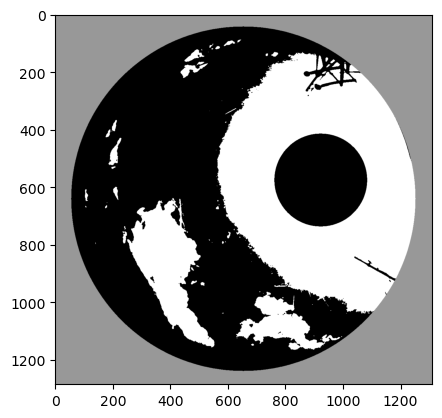

In [47]:
plt.imshow(new2, cmap='gray')

In [48]:
new2

array([[152, 152, 152, ..., 152, 152, 152],
       [152, 152, 152, ..., 152, 152, 152],
       [152, 152, 152, ..., 152, 152, 152],
       ...,
       [152, 152, 152, ..., 152, 152, 152],
       [152, 152, 152, ..., 152, 152, 152],
       [152, 152, 152, ..., 152, 152, 152]], dtype=uint8)

In [49]:
import numpy as np
gray_sum = np.sum(new2==152)
white_sum = np.sum(new2==255)
black_sum = np.sum(new2==0)

In [50]:
print(gray_sum)
print(white_sum)
print(black_sum)

559965
464035
659350


In [51]:
total = white_sum+black_sum
cloud_pixel = (white_sum/total)*100
print(cloud_pixel)

41.30685383906675


In [52]:
new2.shape

(1285, 1310)

In [53]:
image = cv2.imread(img_path, 0)

In [54]:
is_normalized = True
is_reduce_noise = True

In [55]:
# Set total number of bins in the histogram
# Apply GaussianBlur to reduce image noise if it is required
if is_reduce_noise:
    image = cv2.GaussianBlur(image, (5, 5), 0)

bins_num = 256
 
# Get the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)
 
# Get normalized histogram if it is required
if is_normalized:
    hist = np.divide(hist.ravel(), hist.max())
 
# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
 
# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
 
# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
 
# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)
 
threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

Otsu's algorithm implementation thresholding result:  90.78515625


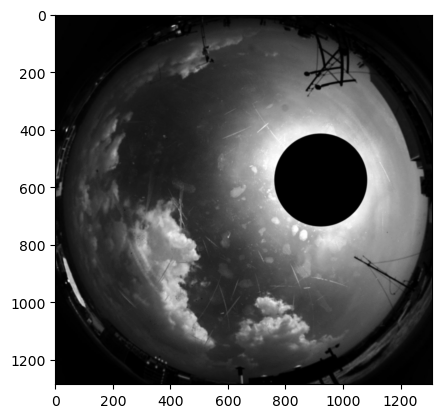

In [56]:
plt.imshow(image, cmap='gray')